In [1]:
import DataProcess as DP

#load the data
subj_filename='./PAMAP2_Dataset/Protocol/subject101.dat'
HR_rest,HR_max=75,193
dp=DP.dataprocess(subj_filename,HR_rest,HR_max)

In [3]:
#dp.data_segmented is the feature matrix. Each row corresponds to features calculated from a 5.12 time slice. 
#In this case there are 426 data points and each points have 132 features
dp.data_segmented.shape

(426, 132)

In [5]:
#feature labels
print(dp.feat_labels)

['timestamp_mean', 'activityID_mean', 'heart_rate_mean', 'hand_temp_mean', 'hand_acc16g_x_mean', 'hand_acc16g_y_mean', 'hand_acc16g_z_mean', 'hand_gyro_x_mean', 'hand_gyro_y_mean', 'hand_gyro_z_mean', 'hand_mag_x_mean', 'hand_mag_y_mean', 'hand_mag_z_mean', 'chest_temp_mean', 'chest_acc16g_x_mean', 'chest_acc16g_y_mean', 'chest_acc16g_z_mean', 'chest_gyro_x_mean', 'chest_gyro_y_mean', 'chest_gyro_z_mean', 'chest_mag_x_mean', 'chest_mag_y_mean', 'chest_mag_z_mean', 'ankle_temp_mean', 'ankle_acc16g_x_mean', 'ankle_acc16g_y_mean', 'ankle_acc16g_z_mean', 'ankle_gyro_x_mean', 'ankle_gyro_y_mean', 'ankle_gyro_z_mean', 'ankle_mag_x_mean', 'ankle_mag_y_mean', 'ankle_mag_z_mean', 'timestamp_median', 'activityID_median', 'heart_rate_median', 'hand_temp_median', 'hand_acc16g_x_median', 'hand_acc16g_y_median', 'hand_acc16g_z_median', 'hand_gyro_x_median', 'hand_gyro_y_median', 'hand_gyro_z_median', 'hand_mag_x_median', 'hand_mag_y_median', 'hand_mag_z_median', 'chest_temp_median', 'chest_acc16g_x_

In [20]:
# Chunks are the preprocessed data before feature extraction. dp.chunks is a list of chunks. See DocString of dp.preprocess
[(DP.activity_dict[x[0,1]],x.shape) for x in dp.chunks]

[('lying', (25187, 33)),
 ('sitting', (21480, 33)),
 ('standing', (19717, 33)),
 ('ironing', (21573, 33)),
 ('vacuum cleaning', (20941, 33)),
 ('ascending stairs', (6120, 33)),
 ('descending stairs', (5480, 33)),
 ('ascending stairs', (5770, 33)),
 ('descending stairs', (5419, 33)),
 ('walking', (20253, 33)),
 ('nordic walking', (18265, 33)),
 ('cycling', (21575, 33)),
 ('running', (19265, 33)),
 ('rope jumping', (10912, 33))]

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
dp.df

,timestamp_mean,activityID_mean,heart_rate_mean,hand_temp_mean,hand_acc16g_x_mean,hand_acc16g_y_mean,hand_acc16g_z_mean,hand_gyro_x_mean,hand_gyro_y_mean,hand_gyro_z_mean,...,ankle_temp_peak,ankle_acc16g_x_peak,ankle_acc16g_y_peak,ankle_acc16g_z_peak,ankle_gyro_x_peak,ankle_gyro_y_peak,ankle_gyro_z_peak,ankle_mag_x_peak,ankle_mag_y_peak,ankle_mag_z_peak
0,50.215,1.0,94.348848,30.523682,-1.879247,4.788385,6.990495,0.107901,-0.251155,0.211265,...,30.9375,15.252700,29.71820,12.87120,2.609650,1.813310,3.461520,117.2680,46.5085,54.10840
1,55.335,1.0,97.572166,30.571045,0.385014,5.728775,7.995225,-0.015914,-0.031787,0.073627,...,31.0000,0.796365,8.45641,6.37917,0.163835,0.077943,0.091133,15.8144,45.6696,11.47720
2,60.455,1.0,95.238678,30.625000,6.138466,4.687556,5.905270,0.108601,0.000832,0.093104,...,31.0000,0.811769,8.18447,6.64932,0.097425,0.080968,0.058141,15.5624,46.0851,8.62547
3,65.575,1.0,91.322497,30.666870,6.105873,4.933169,5.846599,0.004938,0.002278,-0.007819,...,31.0625,0.841604,8.03427,6.68939,0.069279,0.077147,0.045535,15.6788,46.0951,8.25636
4,70.695,1.0,86.938228,30.694580,6.088404,4.999214,5.824916,0.003294,0.007085,-0.006836,...,31.1250,0.810582,7.99476,6.72800,0.084190,0.066471,0.058728,15.6844,45.9978,8.00118
5,75.815,1.0,83.478549,30.748657,6.060006,5.065066,5.805100,0.002001,0.007008,-0.008587,...,31.1875,0.771153,7.99382,6.80513,0.072512,0.081066,0.053266,15.4548,46.1708,7.75371
6,80.935,1.0,81.956104,30.781982,6.039289,5.102343,5.787149,0.002602,0.008558,-0.006576,...,31.1875,0.767655,7.91803,6.80590,0.077067,0.071952,0.046797,15.4510,46.0586,7.38579
7,86.055,1.0,81.205310,30.812500,6.020525,5.111069,5.801647,0.002097,0.007666,-0.006259,...,31.2500,0.736831,7.91730,6.92032,0.074478,0.085786,0.050027,15.5657,46.0872,7.25870
8,91.175,1.0,80.169492,30.870850,6.002166,5.112415,5.795279,0.005502,0.004623,-0.005792,...,31.2500,0.743235,7.87918,6.84481,0.077782,0.063896,0.050850,15.5730,46.1804,7.38529
9,96.295,1.0,79.875199,30.882080,6.020237,5.109906,5.795708,0.001015,0.009357,-0.005227,...,31.3125,0.743235,7.88030,6.84481,0.079934,0.066183,0.045871,15.3374,46.1696,7.51216


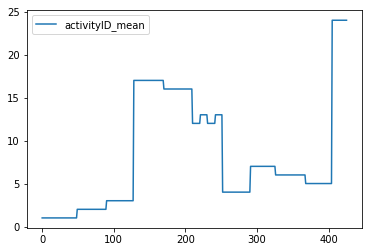

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
dp.df.plot(y='activityID_mean');